<a href="https://colab.research.google.com/github/Lorenals97/CIS9655Group3/blob/main/CIS_9655_Group_3_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#Import Libraries 

import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
#Import the dataset 

nypd= pd.read_csv('https://raw.githubusercontent.com/Lorenals97/NYPD-Shooting-/main/NYPD_Shooting_Incident_Data__Historic_.csv')

In [50]:
nypd.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,236168668,11/11/2021,15:04:00,BROOKLYN,79,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,996313.0,187499.0,40.681318,-73.956509,POINT (-73.95650899099996 40.68131820000008)
1,231008085,07/16/2021,22:05:00,BROOKLYN,72,0.0,NaN,False,45-64,M,ASIAN / PACIFIC ISLANDER,25-44,M,ASIAN / PACIFIC ISLANDER,981845.0,171118.0,40.636364,-74.008667,POINT (-74.00866668999998 40.63636384100005)
2,230717903,07/11/2021,01:09:00,BROOKLYN,79,0.0,NaN,False,<18,M,BLACK,25-44,M,BLACK,996546.0,187436.0,40.681145,-73.955669,POINT (-73.95566903799994 40.68114495900005)
3,237712309,12/11/2021,13:42:00,BROOKLYN,81,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1001139.0,192775.0,40.695792,-73.939096,POINT (-73.939095905 40.69579171600003)
4,224465521,02/16/2021,20:00:00,QUEENS,113,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1050710.0,184826.0,40.673740,-73.760411,POINT (-73.76041066999993 40.67374017600008)


In [51]:
#Viewing the dimensions of the dataframe

nypd.shape

(25596, 19)

In [52]:
#Checking for missing values  
nypd.isnull().sum()

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
PRECINCT                       0
JURISDICTION_CODE              2
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
Lon_Lat                        0
dtype: int64

In [53]:
#Dropping some columns location has about 14k missing values , and incident key is an ID so its not necessary for analysis 
nypd = nypd.drop(['LOCATION_DESC','INCIDENT_KEY'], axis=1)

In [54]:
#Dropping the rows in which there are missing values 
nypd = nypd.dropna()

In [55]:
#check for missing values again to make sure 

nypd.isnull().sum()

OCCUR_DATE                 0
OCCUR_TIME                 0
BORO                       0
PRECINCT                   0
JURISDICTION_CODE          0
STATISTICAL_MURDER_FLAG    0
PERP_AGE_GROUP             0
PERP_SEX                   0
PERP_RACE                  0
VIC_AGE_GROUP              0
VIC_SEX                    0
VIC_RACE                   0
X_COORD_CD                 0
Y_COORD_CD                 0
Latitude                   0
Longitude                  0
Lon_Lat                    0
dtype: int64

In [56]:
nypd.shape #The resulting dataset is 16,250 rows and 17 columns 

(16250, 17)

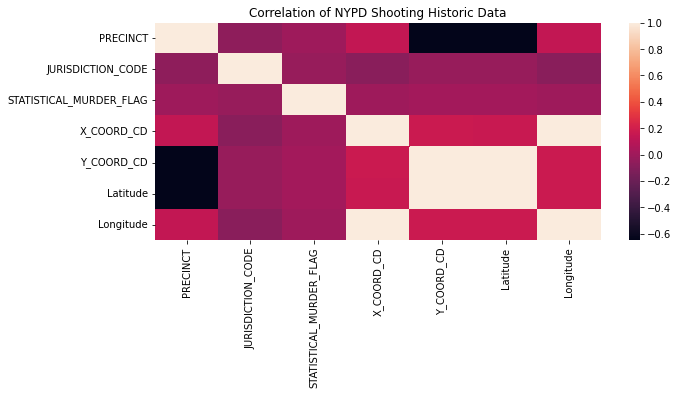

In [57]:
#Heatmap showing correlation 

corr = nypd.corr()

sns.heatmap(corr).set(title= 'Correlation of NYPD Shooting Historic Data')
plt.show()

**Part 1: Date/Time Data NYPD Historic Shooting (Lorena Severino)**

---



In [58]:
#Convert to datetime data type to extract year and month , and add year and month columns to dataframe

date_col = (pd.DatetimeIndex(nypd['OCCUR_DATE']))
time_col = (pd.DatetimeIndex(nypd['OCCUR_TIME']))

#print(date_values)

nypd['Year'] = date_col.year
nypd['Month'] = date_col.month
nypd['Day'] = date_col.weekday
nypd['Hour'] = time_col.hour

print(nypd)


       OCCUR_DATE OCCUR_TIME       BORO  PRECINCT  JURISDICTION_CODE  \
1      07/16/2021   22:05:00   BROOKLYN        72                0.0   
2      07/11/2021   01:09:00   BROOKLYN        79                0.0   
9      03/07/2021   06:15:00   BROOKLYN        75                0.0   
10     07/21/2021   00:40:00  MANHATTAN        32                0.0   
12     05/09/2021   02:50:00      BRONX        41                2.0   
...           ...        ...        ...       ...                ...   
25589  06/25/2009   23:20:00     QUEENS       110                0.0   
25591  08/12/2018   19:50:00   BROOKLYN        84                0.0   
25593  02/25/2011   01:12:00   BROOKLYN        81                0.0   
25594  03/17/2018   00:46:00      BRONX        43                0.0   
25595  10/05/2020   12:00:00     QUEENS       113                0.0   

       STATISTICAL_MURDER_FLAG PERP_AGE_GROUP PERP_SEX  \
1                        False          45-64        M   
2                  

In [59]:
#Double Checking our Columns 

nypd.columns

Index(['OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'PRECINCT', 'JURISDICTION_CODE',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'Lon_Lat', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [60]:
#Incident Counts by Year

inc_year = nypd.groupby('Year')
inc_year_1 = inc_year['Year'].count()
inc_year_1

Year
2006    1890
2007    1605
2008    1737
2009    1639
2010    1214
2011     992
2012     825
2013     698
2014     733
2015     766
2016     640
2017     578
2018     549
2019     544
2020     878
2021     962
Name: Year, dtype: int64

In [61]:
#Incident Counts by Month

inc_month = nypd.groupby('Month')
inc_month_1 = inc_month['Month'].count()
inc_month_1

Month
1     1107
2      840
3     1046
4     1251
5     1558
6     1660
7     1824
8     1812
9     1492
10    1366
11    1168
12    1126
Name: Month, dtype: int64

In [62]:
#Incident Counts by Day

inc_day = nypd.groupby('Day')
inc_day_1 = inc_day['Day'].count()
inc_day_1

Day
0    2234
1    1933
2    1847
3    1799
4    2177
5    3080
6    3180
Name: Day, dtype: int64

In [63]:
#Incident Counts by Hour

inc_hour = nypd.groupby('Hour')
inc_hour_1 = inc_hour['Hour'].count()
inc_hour_1

Hour
0     1176
1     1164
2     1003
3      940
4      825
5      415
6      214
7      162
8      133
9      155
10     184
11     262
12     319
13     350
14     539
15     631
16     671
17     703
18     786
19     881
20     974
21    1214
22    1204
23    1345
Name: Hour, dtype: int64

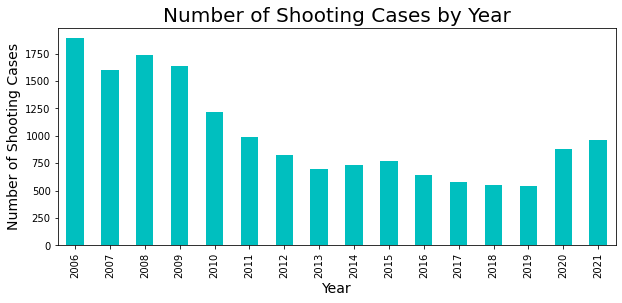

In [64]:
#Bar Chart showing Shooting Incidents by Year

inc_year_plot = inc_year_1.plot(kind='bar', color = 'c')
inc_year_plot.set_xlabel("Year",fontsize = 14)
inc_year_plot.set_ylabel("Number of Shooting Cases",fontsize = 14)
inc_year_plot.set_title("Number of Shooting Cases by Year",fontsize = 20)
plt.show()

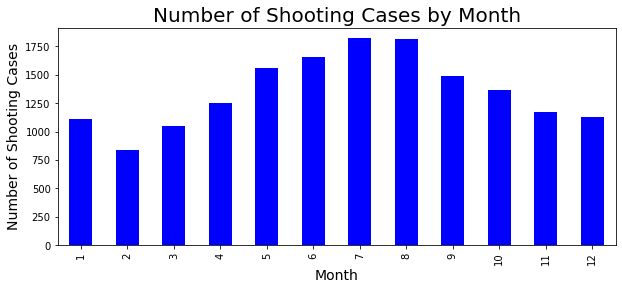

In [65]:
#Bar Chart showing Shooting Incidents by Month

inc_month_plot = inc_month_1.plot(kind='bar', color= 'b')
inc_month_plot.set_xlabel("Month",fontsize = 14)
inc_month_plot.set_ylabel("Number of Shooting Cases",fontsize = 14)
inc_month_plot.set_title("Number of Shooting Cases by Month",fontsize = 20)
plt.show()

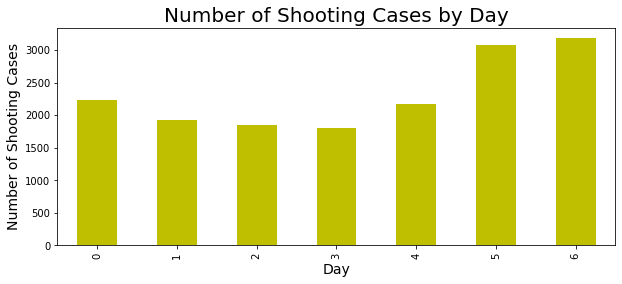

In [66]:
#Bar Chart showing Shooting Incidents by Day of the Week (Zero is Monday)

inc_day_plot = inc_day_1.plot(kind='bar', color = 'y')
inc_day_plot.set_xlabel("Day",fontsize = 14)
inc_day_plot.set_ylabel("Number of Shooting Cases", fontsize = 14)
inc_day_plot.set_title("Number of Shooting Cases by Day", fontsize = 20)
plt.show()

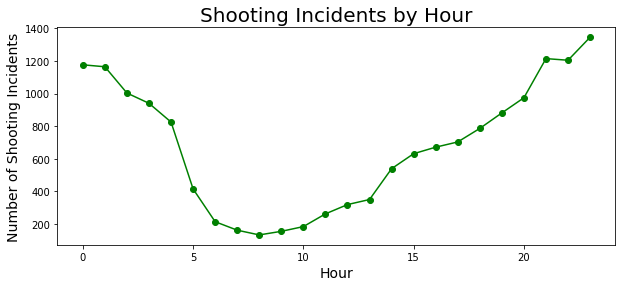

In [67]:
#Line plot showing Shooting incidents by the hour (universal time)

plt.plot(inc_hour_1,color ='g', marker='o')
plt.xlabel('Hour', fontsize = 14)
plt.ylabel('Number of Shooting Incidents', fontsize = 14)
plt.title('Shooting Incidents by Hour', fontsize = 20)
plt.show()

In [68]:
#Looking further into Shooting incidents and Covid

precovid = nypd[nypd['Year'] == 2019]
covid = nypd[nypd['Year'] == 2020]
postcovid = nypd[nypd['Year'] == 2021]


In [69]:
precovid_1 = precovid.groupby('Month')
precovid_2 = precovid_1['Month'].count()
precovid_2

covid_1 = covid.groupby('Month')
covid_2 = covid_1['Month'].count()
covid_2

postcovid_1 = postcovid.groupby('Month')
postcovid_2 = postcovid_1['Month'].count()
postcovid_2

Month
1      56
2      49
3      77
4      90
5     118
6     103
7      92
8     104
9      93
10     76
11     65
12     39
Name: Month, dtype: int64

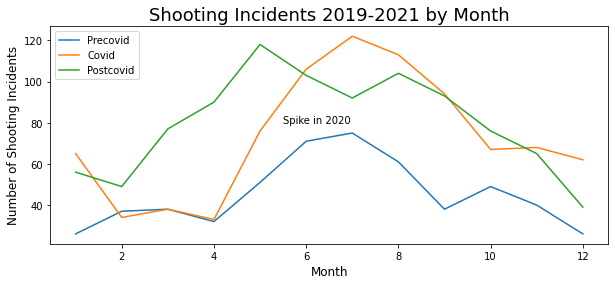

In [70]:
#Line Chart to show Shootings by Month over Covid Years (2019-2021)

line1 = plt.plot(precovid_2)
line2 = plt.plot(covid_2)
line3 = plt.plot(postcovid_2)

plt.xlabel('Month', fontsize = 12)
plt.ylabel('Number of Shooting Incidents', fontsize = 12)
plt.title('Shooting Incidents 2019-2021 by Month', fontsize = 18)
plt.legend(['Precovid', 'Covid','Postcovid'], loc=2)
plt.rcParams['figure.figsize'] = [10 , 4]
plt.annotate(xy=[5.5, 80], s='Spike in 2020')

plt.show()

In [71]:
precovid_h_1 = precovid.groupby('Hour')
precovid_h_2 = precovid_h_1['Hour'].count()
precovid_h_2

covid_h_1 = covid.groupby('Hour')
covid_h_2 = covid_h_1['Hour'].count()
covid_h_2

postcovid_h_1 = postcovid.groupby('Hour')
postcovid_h_2 = postcovid_h_1['Hour'].count()
postcovid_h_2

Hour
0      40
1      44
2      45
3      31
4      28
5      16
6      16
7      17
8      13
9      15
10     12
11     12
12     30
13     36
14     26
15     42
16     56
17     55
18     45
19     60
20     69
21     72
22     78
23    104
Name: Hour, dtype: int64

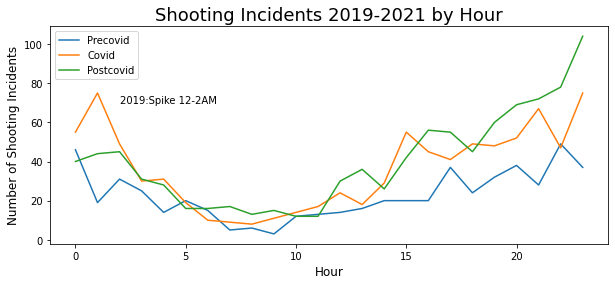

In [72]:
#Line Chart to show Shootings by Hour over Covid Years (2019-2021)

line1 = plt.plot(precovid_h_2)
line2 = plt.plot(covid_h_2)
line3 = plt.plot(postcovid_h_2)

plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Number of Shooting Incidents', fontsize = 12)
plt.title('Shooting Incidents 2019-2021 by Hour', fontsize = 18)
plt.legend(['Precovid', 'Covid','Postcovid'], loc=2)
plt.rcParams['figure.figsize'] = [10 , 4]
plt.annotate(xy=[2, 70], s='2019:Spike 12-2AM')

plt.show()

**Part 2: Location Data NYPD Historic Shooting (Chengzhi Zheng)**

In [ ]:
#jurisdiction_code
shooting_jurisdiction_code=nypd.groupby("JURISDICTION_CODE")
shooting_jurisdiction_code1=shooting_jurisdiction_code["JURISDICTION_CODE"].count()
shooting_jurisdiction_code1

JURISDICTION_CODE
0.0    13659
1.0       46
2.0     2545
Name: JURISDICTION_CODE, dtype: int64

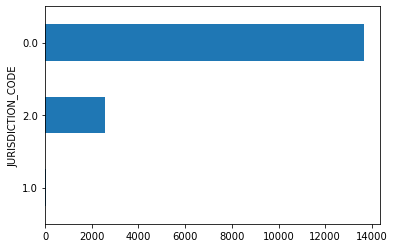

In [ ]:
shooting_jurisdiction_code_plot=shooting_jurisdiction_code1.sort_values().plot(kind="barh")

In [ ]:
#Manhattan Shooting Incidents Jurisdiction Code Distribution

In [ ]:
nypd_manhattan=nypd.loc[nypd["BORO"]== "MANHATTAN"]
nypd_manhattan

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
10,07/21/2021,00:40:00,MANHATTAN,32,0.0,False,25-44,M,BLACK,25-44,M,BLACK,998094.000,235038.000000,40.811798,-73.949990,POINT (-73.94998985099994 40.811798195000044)
19,09/04/2021,20:18:00,MANHATTAN,32,0.0,False,18-24,M,WHITE HISPANIC,18-24,M,ASIAN / PACIFIC ISLANDER,998593.000,235938.000000,40.814268,-73.948185,POINT (-73.94818528599995 40.814267648000055)
24,03/10/2021,07:30:00,MANHATTAN,28,0.0,False,25-44,M,BLACK,18-24,M,BLACK,998054.000,232172.000000,40.803932,-73.950140,POINT (-73.95014024399995 40.80393187900006)
32,10/06/2021,20:21:00,MANHATTAN,28,0.0,False,<18,M,WHITE HISPANIC,<18,M,BLACK,996674.000,232475.000000,40.804766,-73.955124,POINT (-73.95512435799998 40.80476557900005)
33,11/16/2021,22:39:00,MANHATTAN,14,0.0,False,18-24,M,BLACK,18-24,M,BLACK,988590.000,213119.000000,40.751646,-73.984337,POINT (-73.98433730999993 40.751646125000036)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25536,02/21/2010,04:53:00,MANHATTAN,7,2.0,True,18-24,M,WHITE HISPANIC,18-24,M,BLACK,987063.125,198657.281250,40.711953,-73.989854,POINT (-73.98985422499999 40.71195286500006)
25537,07/17/2009,17:57:00,MANHATTAN,23,0.0,False,25-44,M,BLACK HISPANIC,25-44,M,BLACK HISPANIC,998368.000,228659.000000,40.794289,-73.949013,POINT (-73.94901343599997 40.79428915600005)
25542,09/04/2007,01:22:00,MANHATTAN,24,0.0,False,UNKNOWN,M,BLACK,18-24,M,BLACK,991368.500,226613.156250,40.788682,-73.974295,POINT (-73.97429472199997 40.78868227500004)
25552,03/11/2014,23:07:00,MANHATTAN,30,0.0,False,25-44,M,BLACK,25-44,M,BLACK,1000116.500,240541.296875,40.826900,-73.942671,POINT (-73.94267053899995 40.82689979400004)


In [ ]:
shooting_jurisdiction_code=nypd_manhattan.groupby("JURISDICTION_CODE")
shooting_jurisdiction_code1=shooting_jurisdiction_code["JURISDICTION_CODE"].count()
shooting_jurisdiction_code1

JURISDICTION_CODE
0.0    1714
1.0      15
2.0     505
Name: JURISDICTION_CODE, dtype: int64

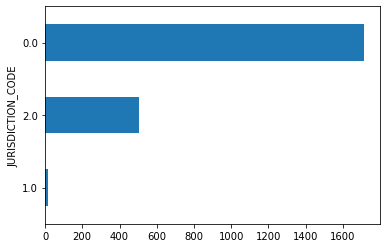

In [ ]:
shooting_jurisdiction_code_plot=shooting_jurisdiction_code1.sort_values().plot(kind="barh")

In [ ]:
#Bronx Shooting Incidents Jurisdiction Code Distribution

In [ ]:
nypd_bronx=nypd.loc[nypd["BORO"]== "BRONX"]
nypd_bronx

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
12,05/09/2021,02:50:00,BRONX,41,2.0,True,25-44,M,BLACK,25-44,M,BLACK HISPANIC,1.014642e+06,240068.000000,40.825563,-73.890187,POINT (-73.89018728699995 40.82556269400004)
17,06/16/2021,23:22:00,BRONX,52,0.0,True,25-44,M,BLACK,25-44,F,BLACK,1.014313e+06,254123.000000,40.864141,-73.891313,POINT (-73.89131303799998 40.864140648000046)
21,06/16/2021,23:22:00,BRONX,52,0.0,False,18-24,M,WHITE HISPANIC,25-44,F,BLACK,1.014313e+06,254123.000000,40.864141,-73.891313,POINT (-73.89131303799998 40.864140648000046)
22,09/29/2021,12:50:00,BRONX,48,0.0,False,18-24,M,BLACK,<18,M,BLACK HISPANIC,1.016838e+06,250252.000000,40.853507,-73.882203,POINT (-73.88220309599996 40.85350696200004)
31,03/21/2021,20:01:00,BRONX,42,0.0,False,<18,M,BLACK,25-44,M,BLACK,1.012293e+06,245330.000000,40.840013,-73.898653,POINT (-73.89865282699996 40.84001313300007)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,07/31/2007,22:00:00,BRONX,44,0.0,False,UNKNOWN,M,BLACK,25-44,M,BLACK,1.006434e+06,244344.000000,40.837324,-73.919831,POINT (-73.91983075699994 40.83732351100008)
25574,11/15/2012,18:23:00,BRONX,47,0.0,False,18-24,M,BLACK,25-44,M,BLACK,1.027440e+06,257814.343750,40.874218,-73.843830,POINT (-73.84382988799996 40.87421778200007)
25576,08/23/2012,13:22:00,BRONX,44,0.0,True,45-64,M,BLACK,45-64,M,BLACK,1.004886e+06,240825.343750,40.827670,-73.925437,POINT (-73.92543701999995 40.827669567000044)
25582,07/28/2019,04:00:00,BRONX,50,0.0,False,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1.010984e+06,261033.906250,40.883120,-73.903322,POINT (-73.90332187399997 40.88311966300006)


In [ ]:
shooting_jurisdiction_code=nypd_bronx.groupby("JURISDICTION_CODE")
shooting_jurisdiction_code1=shooting_jurisdiction_code["JURISDICTION_CODE"].count()
shooting_jurisdiction_code1

JURISDICTION_CODE
0.0    4252
1.0       9
2.0     629
Name: JURISDICTION_CODE, dtype: int64

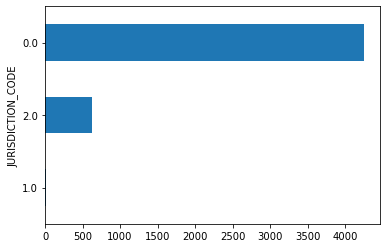

In [ ]:
shooting_jurisdiction_code_plot=shooting_jurisdiction_code1.sort_values().plot(kind="barh")

In [ ]:
#Queens Shooting Incidents Jurisdiction Code Distribution

In [ ]:
nypd_queens=nypd.loc[nypd["BORO"]== "QUEENS"]
nypd_queens

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
25,08/13/2021,01:00:00,QUEENS,109,0.0,True,18-24,M,BLACK,18-24,F,BLACK,1.031552e+06,216518.000000,40.760850,-73.829253,POINT (-73.82925306599996 40.760850049000055)
105,08/05/2021,08:57:00,QUEENS,103,0.0,False,25-44,M,BLACK,25-44,M,WHITE HISPANIC,1.037949e+06,195015.000000,40.701793,-73.806333,POINT (-73.80633317499998 40.70179318200008)
113,09/06/2021,03:52:00,QUEENS,102,0.0,False,18-24,M,ASIAN / PACIFIC ISLANDER,25-44,M,BLACK,1.034148e+06,192848.000000,40.695868,-73.820058,POINT (-73.82005769499993 40.69586753200008)
128,09/30/2021,07:30:00,QUEENS,103,0.0,False,25-44,M,BLACK,25-44,M,BLACK,1.040325e+06,191194.000000,40.691291,-73.797796,POINT (-73.79779584499995 40.69129071300006)
154,06/29/2021,19:14:00,QUEENS,102,0.0,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,1.021828e+06,190928.000000,40.690658,-73.864497,POINT (-73.86449709799997 40.69065847000007)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25494,01/02/2012,05:00:00,QUEENS,113,0.0,False,25-44,M,BLACK,18-24,M,BLACK,1.046624e+06,184397.578125,40.672594,-73.775145,POINT (-73.77514452399998 40.672593988000074)
25530,04/19/2009,05:30:00,QUEENS,113,0.0,False,UNKNOWN,U,UNKNOWN,25-44,M,BLACK,1.050338e+06,193043.875000,40.696299,-73.761671,POINT (-73.76167068399997 40.69629906900008)
25558,05/26/2007,16:53:00,QUEENS,113,0.0,False,UNKNOWN,M,BLACK,18-24,M,BLACK,1.049729e+06,189529.968750,40.686659,-73.763903,POINT (-73.76390284099995 40.686658771000054)
25589,06/25/2009,23:20:00,QUEENS,110,0.0,False,UNKNOWN,U,UNKNOWN,18-24,M,BLACK,1.021804e+06,207825.171875,40.737037,-73.864490,POINT (-73.86449006199996 40.73703722900007)


In [ ]:
shooting_jurisdiction_code=nypd_queens.groupby("JURISDICTION_CODE")
shooting_jurisdiction_code1=shooting_jurisdiction_code["JURISDICTION_CODE"].count()
shooting_jurisdiction_code1

JURISDICTION_CODE
0.0    2183
1.0       6
2.0     272
Name: JURISDICTION_CODE, dtype: int64

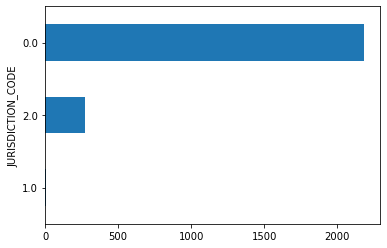

In [ ]:
shooting_jurisdiction_code_plot=shooting_jurisdiction_code1.sort_values().plot(kind="barh")

In [ ]:
#Brooklyn Shooting Incidents Jurisdiction Code Distribution

In [ ]:
nypd_brooklyn=nypd.loc[nypd["BORO"]== "BROOKLYN"]
nypd_brooklyn

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
1,07/16/2021,22:05:00,BROOKLYN,72,0.0,False,45-64,M,ASIAN / PACIFIC ISLANDER,25-44,M,ASIAN / PACIFIC ISLANDER,9.818450e+05,171118.000000,40.636364,-74.008667,POINT (-74.00866668999998 40.63636384100005)
2,07/11/2021,01:09:00,BROOKLYN,79,0.0,False,<18,M,BLACK,25-44,M,BLACK,9.965460e+05,187436.000000,40.681145,-73.955669,POINT (-73.95566903799994 40.68114495900005)
9,03/07/2021,06:15:00,BROOKLYN,75,0.0,True,25-44,M,BLACK HISPANIC,25-44,M,WHITE HISPANIC,1.020492e+06,187865.000000,40.682257,-73.869331,POINT (-73.86933111399996 40.68225681500007)
18,01/12/2021,22:12:00,BROOKLYN,69,0.0,False,18-24,M,BLACK,18-24,M,BLACK,1.012580e+06,172896.000000,40.641199,-73.897921,POINT (-73.89792064799997 40.64119909400005)
48,04/02/2021,13:25:00,BROOKLYN,61,2.0,False,18-24,M,BLACK,18-24,M,BLACK,9.951180e+05,155709.000000,40.594063,-73.960869,POINT (-73.96086869299995 40.59406298000005)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25579,10/08/2016,03:55:00,BROOKLYN,68,0.0,False,25-44,M,WHITE HISPANIC,25-44,M,WHITE HISPANIC,9.766536e+05,169712.671875,40.632504,-74.027370,POINT (-74.02736992699994 40.63250358100004)
25584,10/27/2014,17:05:00,BROOKLYN,67,0.0,False,18-24,M,BLACK,25-44,M,BLACK,9.987121e+05,170676.593750,40.635141,-73.947895,POINT (-73.94789538599997 40.635140797000076)
25588,08/26/2013,13:25:00,BROOKLYN,75,0.0,True,18-24,M,BLACK,25-44,M,ASIAN / PACIFIC ISLANDER,1.014019e+06,180484.187500,40.662022,-73.892700,POINT (-73.89270047199994 40.662022285000035)
25591,08/12/2018,19:50:00,BROOKLYN,84,0.0,False,25-44,M,BLACK,65+,M,BLACK,9.891547e+05,193164.265625,40.696875,-73.982314,POINT (-73.98231375199998 40.69687491500008)


In [ ]:
shooting_jurisdiction_code=nypd_brooklyn.groupby("JURISDICTION_CODE")
shooting_jurisdiction_code1=shooting_jurisdiction_code["JURISDICTION_CODE"].count()
shooting_jurisdiction_code1

JURISDICTION_CODE
0.0    4980
1.0      16
2.0    1078
Name: JURISDICTION_CODE, dtype: int64

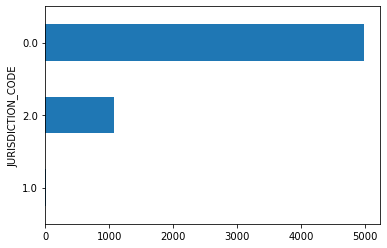

In [ ]:
shooting_jurisdiction_code_plot=shooting_jurisdiction_code1.sort_values().plot(kind="barh")

In [ ]:
shooting_jurisdiction_code=nypd_brooklyn.groupby("JURISDICTION_CODE")
shooting_jurisdiction_code1=shooting_jurisdiction_code["JURISDICTION_CODE"].count()
shooting_jurisdiction_code1

JURISDICTION_CODE
0.0    4980
1.0      16
2.0    1078
Name: JURISDICTION_CODE, dtype: int64

In [ ]:
#Staten Island Shooting Incidents Jurisdiction Code Distribution

In [ ]:
nypd_staten_island=nypd.loc[nypd["BORO"]== "STATEN ISLAND"]
nypd_staten_island

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
83,05/02/2021,20:22:00,STATEN ISLAND,120,0.0,False,25-44,M,BLACK,25-44,M,BLACK,952145.0000,171452.000000,40.637223,-74.115678,POINT (-74.11567771499993 40.63722273800005)
97,06/22/2021,16:11:00,STATEN ISLAND,120,0.0,False,25-44,M,WHITE,25-44,M,WHITE HISPANIC,965963.0000,159865.000000,40.605458,-74.065859,POINT (-74.06585925399997 40.60545815100004)
223,11/19/2021,21:57:00,STATEN ISLAND,120,0.0,False,25-44,M,WHITE,45-64,M,WHITE,963769.0000,166555.000000,40.623816,-74.073781,POINT (-74.07378089799995 40.62381601700002)
292,11/19/2021,21:57:00,STATEN ISLAND,120,0.0,False,25-44,M,WHITE,25-44,M,WHITE,963769.0000,166555.000000,40.623816,-74.073781,POINT (-74.07378089799995 40.62381601700002)
311,01/16/2021,19:48:00,STATEN ISLAND,120,0.0,True,25-44,M,BLACK,18-24,M,BLACK,960041.0000,163798.000000,40.616239,-74.087201,POINT (-74.08720051399997 40.616239224000026)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25302,08/10/2020,15:20:00,STATEN ISLAND,121,0.0,False,<18,M,BLACK,18-24,M,BLACK,938372.6875,169289.750000,40.631227,-74.165285,POINT (-74.16528539599994 40.63122720300004)
25347,05/17/2011,12:32:00,STATEN ISLAND,123,0.0,True,45-64,M,WHITE,45-64,F,WHITE,932461.5625,134246.765625,40.535009,-74.186313,POINT (-74.18631304299998 40.535008779000066)
25368,01/24/2017,18:35:00,STATEN ISLAND,120,0.0,False,<18,M,BLACK,18-24,M,BLACK,952145.1250,171451.734375,40.637222,-74.115677,POINT (-74.11567726399994 40.63722200900003)
25446,02/11/2007,04:30:00,STATEN ISLAND,120,0.0,True,18-24,M,BLACK,18-24,M,BLACK,963290.1250,167192.406250,40.625564,-74.075508,POINT (-74.07550794499997 40.62556444300003)


In [ ]:
shooting_jurisdiction_code=nypd_staten_island.groupby("JURISDICTION_CODE")
shooting_jurisdiction_code1=shooting_jurisdiction_code["JURISDICTION_CODE"].count()
shooting_jurisdiction_code1

JURISDICTION_CODE
0.0    530
2.0     61
Name: JURISDICTION_CODE, dtype: int64

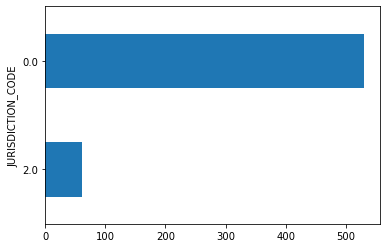

In [ ]:
shooting_jurisdiction_code_plot=shooting_jurisdiction_code1.sort_values().plot(kind="barh")

**Part 3: Victim/Perpetrator Data NYPD Historic Shooting (Jinkai Chen)**

In [79]:
# 5 W’s : Who
# Victim/Perpetrator Stats (Jinkai)

In [80]:
# Horizontal Bar: Perpetrator Race

In [81]:
# Group by and Count "Perpetrator Race" Column
perpetrator_race = nypd.groupby("PERP_RACE")
perpetrator_race_1 = perpetrator_race["PERP_RACE"].count()

In [82]:
# Drop unwanted rows
perpetrator_race_2 = perpetrator_race_1.drop(['UNKNOWN','AMERICAN INDIAN/ALASKAN NATIVE'])

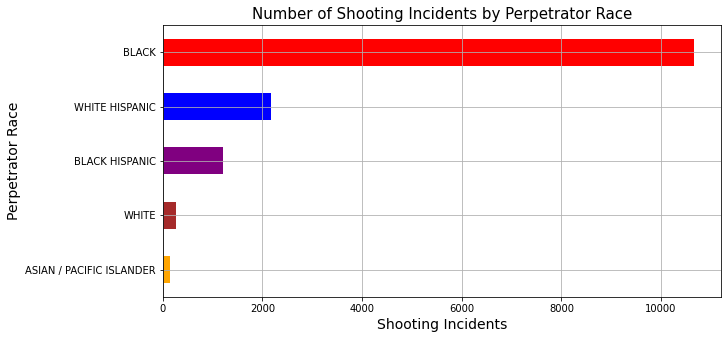

In [83]:
# Create a Sorted Horizontal Bar 
perpetrator_race_2_plot = perpetrator_race_2.sort_values().plot(kind="barh",color=['orange','brown','purple','blue','red'],grid=True,figsize=(10,5))
perpetrator_race_2_plot.set_xlabel("Shooting Incidents",fontsize='14')
perpetrator_race_2_plot.set_ylabel("Perpetrator Race",fontsize='14')
perpetrator_race_2_plot.set_title("Number of Shooting Incidents by Perpetrator Race",fontsize='15')
plt.show()
# horizontal bar plot allows easy comparison for totals of shooting incidents by different race. The majority of shooting incidents are by Black Perpetrator. 

In [84]:
# Vertical Bar with Line: Perpetrator Age Groups

In [85]:
# Groupped by Perpetrator age group
perp_age = nypd.groupby("PERP_AGE_GROUP").count()

In [86]:
# Dropped rows "Unknown", "1020", "940", "224"
perp_age_1 = perp_age.drop(['UNKNOWN','1020','940','224']).reset_index()

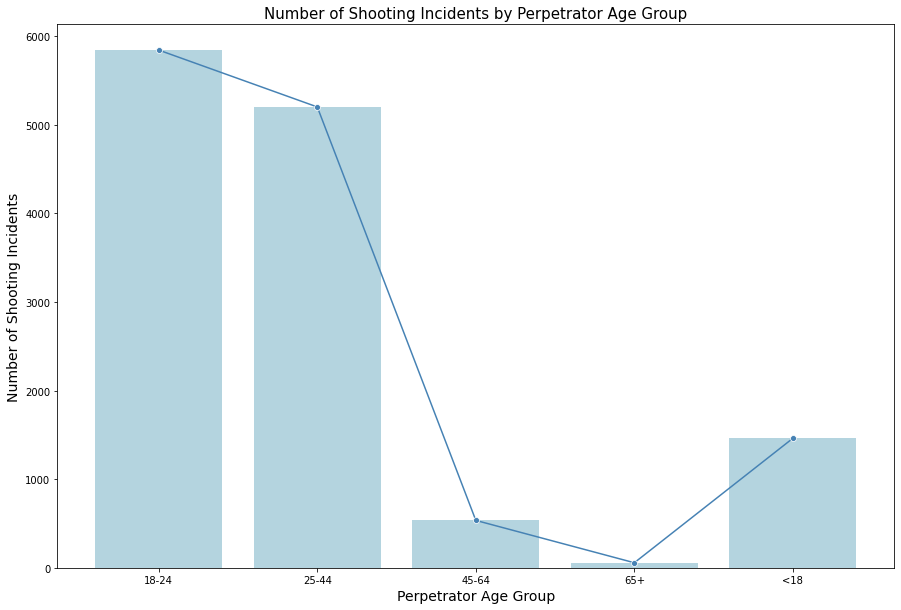

In [87]:
# Plotting each Perpetrator age group with a bar chart and a line chart
fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(x=perp_age_1[perp_age_1.columns[0]],y=perp_age_1[perp_age_1.columns[1]],color='lightblue',ax=ax)
sns.lineplot(x=perp_age_1[perp_age_1.columns[0]],y=perp_age_1[perp_age_1.columns[1]],color='steelblue',marker='o',ax=ax)
ax.set_xlabel('Perpetrator Age Group',fontsize='14')
ax.set_ylabel('Number of Shooting Incidents', fontsize='14')
plt.title('Number of Shooting Incidents by Perpetrator Age Group',fontsize='15')
plt.show()
# The majority of shooting incidents concentrate at Perpetrator's "18-24" and "25-44" Age Groups  

In [88]:
# Stacked Bar: Perpetrator Gender and Age Groups

In [89]:
# Group by Perpetrator Age and Gender
# Count Grouped fields
perp_gender = nypd.groupby(['PERP_AGE_GROUP','PERP_SEX'])
perp_gender_1 = perp_gender.count().reset_index()

In [90]:
# Filtered Perpetrator Gender to be Male Only
# Dropped rows UNKNOWN","224","940","1020" in Perp Age Group
perp_gender_male = perp_gender_1[(perp_gender_1.PERP_SEX == 'M')]
perp_gender_male = perp_gender_male.drop([0,4,12,17])

In [91]:
# Filtered Perpetrator gender to be Female only
# Dropped a row to clean data
perp_gender_female = perp_gender_1[(perp_gender_1.PERP_SEX == 'F')]
perp_gender_female = perp_gender_female.drop(16)

In [92]:
# Renamed Columns
# Merged Male and Female on "PERP_AGE_GROUP"
M = perp_gender_male.rename(columns={'PERP_RACE': 'Male', 'PERP_SEX':'Gender_Male'})
F = perp_gender_female.rename(columns={'PERP_RACE': 'Female', 'PERP_SEX': 'Gender_Female'})
Male_and_Female = pd.merge(M, F, on='PERP_AGE_GROUP')

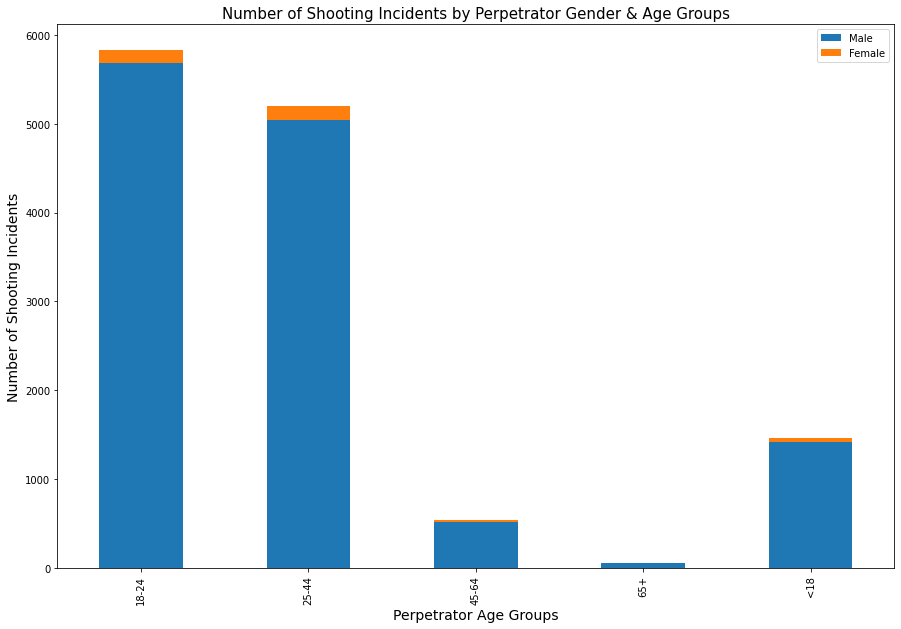

In [93]:
# Created a stacked bar chart based on Perpetrator Gender and Age Groups
Male_and_Female.plot(x='PERP_AGE_GROUP', y=['Male', 'Female'], kind='bar',stacked=True,figsize=(15,10))
plt.title("Number of Shooting Incidents by Perpetrator Gender & Age Groups",fontsize='15')
plt.xlabel("Perpetrator Age Groups",fontsize='14')
plt.ylabel("Number of Shooting Incidents",fontsize='14')
plt.show()
# Stacked vertical bar plot we can visualize the compare totals of shooting incidents across perpetrator's gender and in different age groups. 

**Part 4: Statistical Murder Flag Data NYPD Historic Shooting (Rahat Mahmud)**

In [94]:
#total Number of Deaths
nypd_death=nypd.loc[nypd["STATISTICAL_MURDER_FLAG" ]== True]
nypd_death

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,...,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,Year,Month,Day,Hour
9,03/07/2021,06:15:00,BROOKLYN,75,0.0,True,25-44,M,BLACK HISPANIC,25-44,...,WHITE HISPANIC,1.020492e+06,187865.000000,40.682257,-73.869331,POINT (-73.86933111399996 40.68225681500007),2021,3,6,6
12,05/09/2021,02:50:00,BRONX,41,2.0,True,25-44,M,BLACK,25-44,...,BLACK HISPANIC,1.014642e+06,240068.000000,40.825563,-73.890187,POINT (-73.89018728699995 40.82556269400004),2021,5,6,2
17,06/16/2021,23:22:00,BRONX,52,0.0,True,25-44,M,BLACK,25-44,...,BLACK,1.014313e+06,254123.000000,40.864141,-73.891313,POINT (-73.89131303799998 40.864140648000046),2021,6,2,23
25,08/13/2021,01:00:00,QUEENS,109,0.0,True,18-24,M,BLACK,18-24,...,BLACK,1.031552e+06,216518.000000,40.760850,-73.829253,POINT (-73.82925306599996 40.760850049000055),2021,8,4,1
35,09/13/2021,00:35:00,MANHATTAN,32,0.0,True,18-24,M,BLACK,18-24,...,BLACK,1.001369e+06,236689.000000,40.816324,-73.938155,POINT (-73.93815467099995 40.81632399000005),2021,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25556,08/22/2015,07:30:00,BROOKLYN,83,0.0,True,25-44,M,WHITE HISPANIC,25-44,...,WHITE HISPANIC,1.005154e+06,194758.609375,40.701228,-73.924610,POINT (-73.92460963299999 40.70122768700003),2015,8,5,7
25569,11/15/2019,20:22:00,BRONX,46,0.0,True,<18,M,BLACK,25-44,...,BLACK,1.006957e+06,248722.812500,40.849341,-73.917927,POINT (-73.91792721899998 40.84934073900007),2019,11,4,20
25576,08/23/2012,13:22:00,BRONX,44,0.0,True,45-64,M,BLACK,45-64,...,BLACK,1.004886e+06,240825.343750,40.827670,-73.925437,POINT (-73.92543701999995 40.827669567000044),2012,8,3,13
25578,09/15/2007,04:09:00,BROOKLYN,68,0.0,True,25-44,M,WHITE,25-44,...,WHITE,9.827961e+05,169177.234375,40.631037,-74.005239,POINT (-74.00523935499996 40.63103705800006),2007,9,5,4


In [95]:
# Total Number of Death by boro
death_boro=nypd_death.groupby("BORO")
death_boro1=death_boro["BORO"].count()
death_boro1

BORO
BRONX            1042
BROOKLYN         1136
MANHATTAN         427
QUEENS            489
STATEN ISLAND     128
Name: BORO, dtype: int64

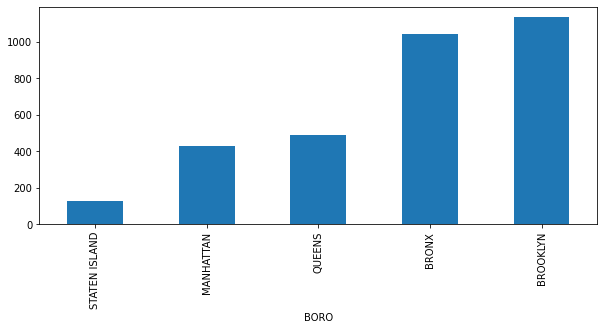

In [96]:
#Bar plot of total number of deaths each boro
death_boro_plot=death_boro1.sort_values().plot(kind="bar")

In [97]:
# Total Number of Death by race
death_race=nypd_death.groupby("VIC_RACE")
death_race1=death_race["VIC_RACE"].count()
death_race1

VIC_RACE
ASIAN / PACIFIC ISLANDER      68
BLACK                       2118
BLACK HISPANIC               280
UNKNOWN                        6
WHITE                        149
WHITE HISPANIC               601
Name: VIC_RACE, dtype: int64

In [98]:
#dropping the unknown values
death_race_2=death_race1.drop("UNKNOWN")
death_race_2

VIC_RACE
ASIAN / PACIFIC ISLANDER      68
BLACK                       2118
BLACK HISPANIC               280
WHITE                        149
WHITE HISPANIC               601
Name: VIC_RACE, dtype: int64

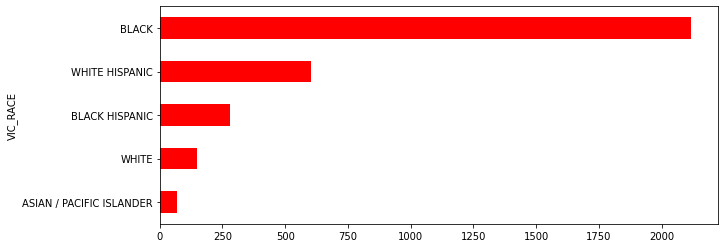

In [99]:
#Bar plot of total number of deaths each race
death_race_plot=death_race_2.sort_values().plot(kind="barh", color='r')

In [100]:
nypd_death.columns

Index(['OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'PRECINCT', 'JURISDICTION_CODE',
       'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',
       'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'Lon_Lat', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [101]:
# Total Number of Death by age
death_age=nypd_death.groupby("VIC_AGE_GROUP")
death_age_1=death_age["VIC_AGE_GROUP"].count()
death_age_1

VIC_AGE_GROUP
18-24      1068
25-44      1564
45-64       278
65+          40
<18         260
UNKNOWN      12
Name: VIC_AGE_GROUP, dtype: int64

In [102]:
#dropping the unknown values
death_age_2=death_age_1.drop("UNKNOWN")
death_age_2

VIC_AGE_GROUP
18-24    1068
25-44    1564
45-64     278
65+        40
<18       260
Name: VIC_AGE_GROUP, dtype: int64

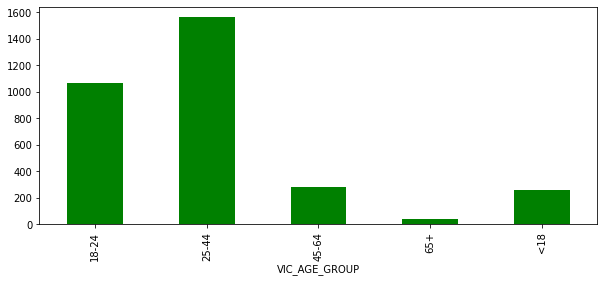

In [103]:
#Bar plot of total number of deaths each race
death_age_plot=death_age_2.plot(kind="bar", color='g')

In [104]:
#Convert to datetime data type to extract year and month , and add year and month columns to dataframe

date_col = (pd.DatetimeIndex(nypd_death['OCCUR_DATE']))
time_col = (pd.DatetimeIndex(nypd_death['OCCUR_TIME']))

#print(date_values)

nypd_death['Year'] = date_col.year
nypd_death['Month'] = date_col.month
nypd_death['Day'] = date_col.weekday
nypd_death['Hour'] = time_col.hour

print(nypd_death)

       OCCUR_DATE OCCUR_TIME       BORO  PRECINCT  JURISDICTION_CODE  \
9      03/07/2021   06:15:00   BROOKLYN        75                0.0   
12     05/09/2021   02:50:00      BRONX        41                2.0   
17     06/16/2021   23:22:00      BRONX        52                0.0   
25     08/13/2021   01:00:00     QUEENS       109                0.0   
35     09/13/2021   00:35:00  MANHATTAN        32                0.0   
...           ...        ...        ...       ...                ...   
25556  08/22/2015   07:30:00   BROOKLYN        83                0.0   
25569  11/15/2019   20:22:00      BRONX        46                0.0   
25576  08/23/2012   13:22:00      BRONX        44                0.0   
25578  09/15/2007   04:09:00   BROOKLYN        68                0.0   
25588  08/26/2013   13:25:00   BROOKLYN        75                0.0   

       STATISTICAL_MURDER_FLAG PERP_AGE_GROUP PERP_SEX       PERP_RACE  \
9                         True          25-44        M  BLACK

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [105]:
#Incident Counts by Year

inc_year = nypd_death.groupby('Year')
inc_year_1 = inc_year['Year'].count()
inc_year_1

Year
2006    378
2007    243
2008    240
2009    234
2010    216
2011    221
2012    169
2013    143
2014    159
2015    186
2016    147
2017    129
2018    147
2019    122
2020    214
2021    274
Name: Year, dtype: int64

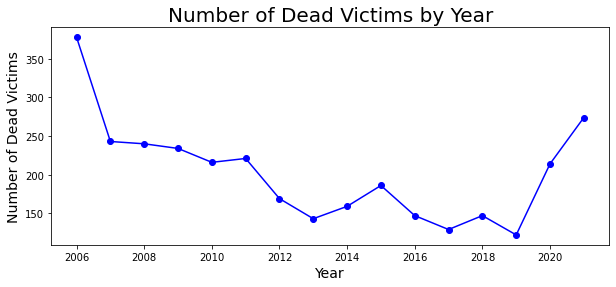

In [106]:
#Bar Chart showing Shooting Incidents by Year

inc_year_plot = inc_year_1.plot(kind='line', color = 'b',marker='o')
inc_year_plot.set_xlabel("Year",fontsize = 14)
inc_year_plot.set_ylabel("Number of Dead Victims",fontsize = 14)
inc_year_plot.set_title("Number of Dead Victims by Year",fontsize = 20)
plt.show()